In [1]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [2]:
NSW_crash = pd.read_csv('NSW_crash_clean.csv')
NSW_crash.head()

,Unnamed: 0,Crash ID,Degree of crash,Degree of crash - detailed,Year of crash,Month of crash,Day of week of crash,Latitude,Longitude,LGA,Urbanisation,Conurbation 1,Surface condition,Weather,Speed limit,Road classification (admin),Alignment,hour,Injuries,Date of crash
0,0,1088679,Fatal,Fatal,2016,January,Saturday,-32.830075,148.293512,Parkes,Country non-urban,Rest of NSW - Rural,Dry,Fine,100,Local,Straight,1,1,2016-01-01
1,1,1088682,Fatal,Fatal,2016,January,Monday,-35.800954,150.132066,Eurobodalla,Country non-urban,Rest of NSW - Rural,Wet,Raining,100,State,Curved,21,1,2016-01-01
2,2,1088829,Non-casualty (towaway),Non-casualty (towaway),2016,January,Friday,-34.031609,151.067157,Sutherland,Sydney metro. area,Syd-Newc-Woll Gtr conurbation,Dry,Fine,70,State,Straight,13,0,2016-01-01
3,3,1088867,Non-casualty (towaway),Non-casualty (towaway),2016,January,Friday,-33.847025,150.967695,Cumberland,Sydney metro. area,Syd-Newc-Woll Gtr conurbation,Dry,Fine,50,Local,Straight,13,0,2016-01-01
4,4,1088880,Non-casualty (towaway),Non-casualty (towaway),2016,January,Friday,-33.873753,151.212595,Sydney,Sydney metro. area,Syd-Newc-Woll Gtr conurbation,Wet,Fine,50,Regional,Straight,17,0,2016-01-01


In [3]:
NSW_crash["Date of crash"] = pd.to_datetime(NSW_crash["Date of crash"])
NSW_crash.dtypes


Unnamed: 0                              int64
Crash ID                                int64
Degree of crash                        object
Degree of crash - detailed             object
Year of crash                           int64
Month of crash                         object
Day of week of crash                   object
Latitude                              float64
Longitude                             float64
LGA                                    object
Urbanisation                           object
Conurbation 1                          object
Surface condition                      object
Weather                                object
Speed limit                             int64
Road classification (admin)            object
Alignment                              object
hour                                    int64
Injuries                                int64
Date of crash                  datetime64[ns]
dtype: object

Text(0, 0.5, 'Seasonal')

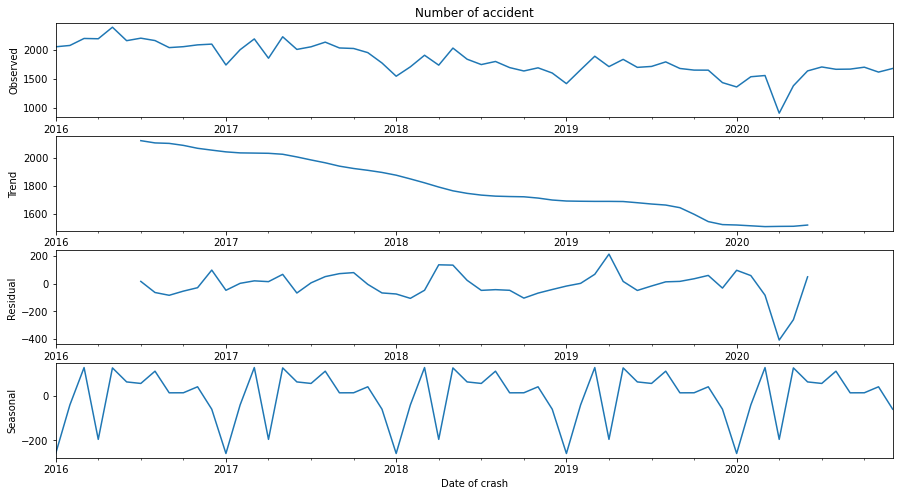

In [25]:
analysis = NSW_crash.groupby('Date of crash')['Crash ID'].count()

decompose_result_add = seasonal_decompose(analysis, model="additive")

trend = decompose_result_add.trend
seasonal = decompose_result_add.seasonal
residual = decompose_result_add.resid

#decompose_result_mult.plot()


fig, (ax0, ax1,ax2,ax3) = plt.subplots(4,1, figsize=(15,8))
decompose_result_add.observed.plot(ax=ax0)
ax0.set_ylabel('Observed')
ax0.set_title('Number of accident')
decompose_result_add.trend.plot(ax=ax1)
ax1.set_ylabel('Trend')

decompose_result_add.resid.plot(ax=ax2)
ax2.set_ylabel('Residual')

decompose_result_add.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')


In [26]:
analysis = analysis.to_frame()
    

In [27]:
analysis['Trend'] = decompose_result_add.trend
analysis['Residual'] = decompose_result_add.resid
analysis['Seasonal'] = decompose_result_add.seasonal

In [31]:
filename = 'seasonality.csv'
analysis.to_csv(filename)